## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/customer_churn_large_dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


## Data Cleaning and Visualization

In [ ]:
df.shape

(100000, 9)

In [ ]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(['CustomerID', 'Name'], axis=1, inplace=True)

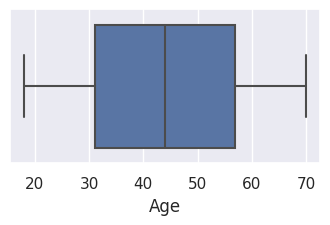

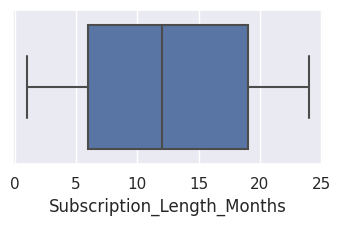

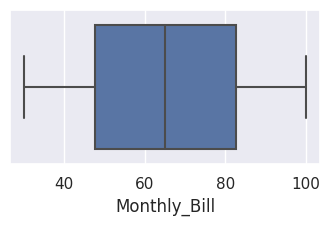

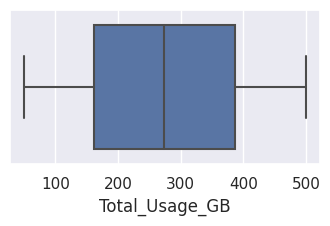

In [ ]:
#Boxplot for outlier detection

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Age'])
plt.show()
sns.boxplot(x=df['Subscription_Length_Months'])
plt.show()
sns.boxplot(x=df['Monthly_Bill'])
plt.show()
sns.boxplot(x=df['Total_Usage_GB'])
plt.show()

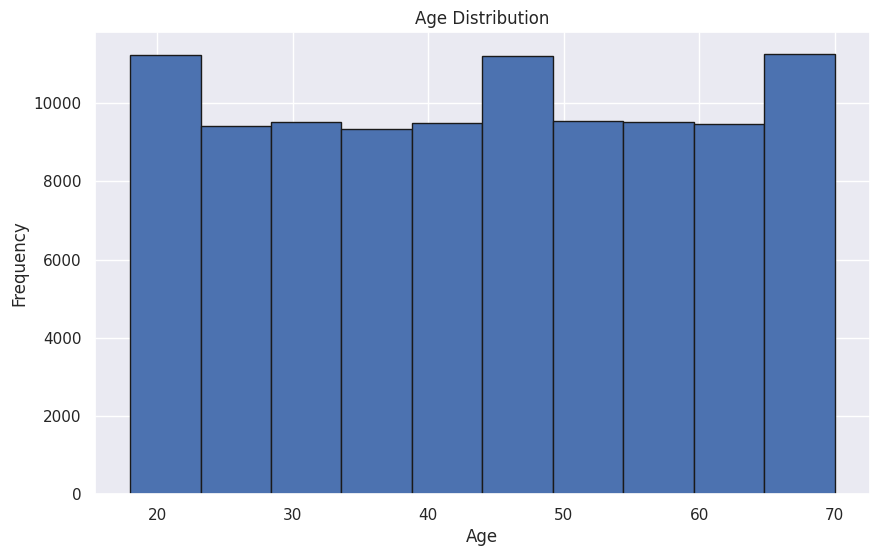

In [ ]:
# Histogram to show the distribution of age
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=10, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

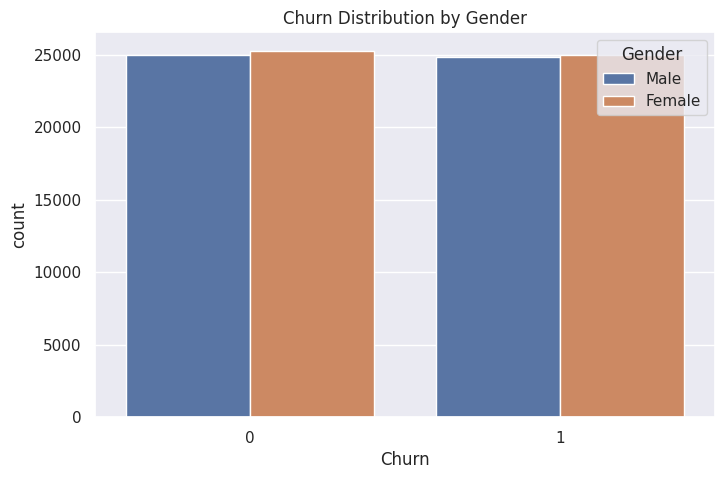

In [ ]:
# Count plot to show the distribution of gender across churn groups
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', hue='Gender', data=df)
plt.title("Churn Distribution by Gender")
plt.show()

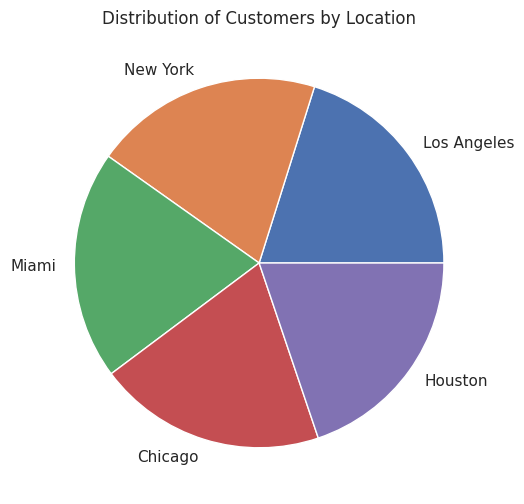

In [ ]:
# Count plot to show the distribution of locations
labels = df['Location'].unique()
plt.figure(figsize=(12, 6))
plt.pie(x=df['Location'].value_counts(), labels = labels, data=df)
plt.title("Distribution of Customers by Location")
plt.show()

<ipython-input-16-2a3b8a6b7552>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='crest')


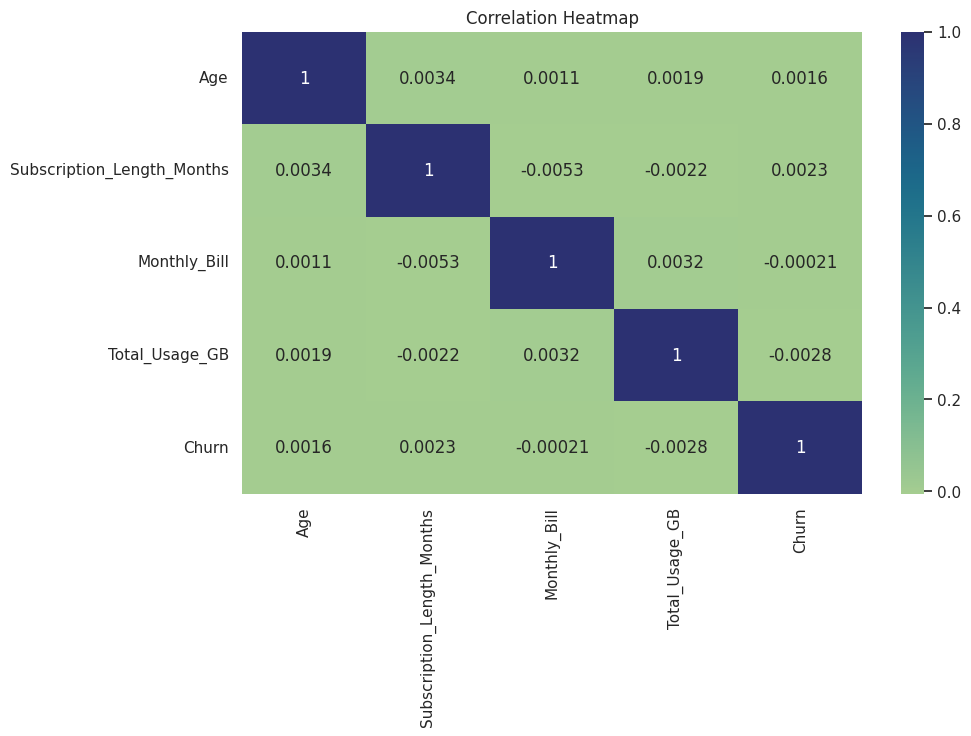

In [ ]:
# Correlation heatmap to see the relationships between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='crest')
plt.title("Correlation Heatmap")
plt.show()

## Feature Engineering

In [ ]:
df['Usage_per_month'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']

# Check the updated DataFrame
print(df.head())

   Age  Gender     Location  Subscription_Length_Months  Monthly_Bill  \
0   63    Male  Los Angeles                          17         73.36   
1   62  Female     New York                           1         48.76   
2   24  Female  Los Angeles                           5         85.47   
3   36  Female        Miami                           3         97.94   
4   46  Female        Miami                          19         58.14   

   Total_Usage_GB  Churn  Usage_per_month  
0             236      0        13.882353  
1             172      0       172.000000  
2             460      0        92.000000  
3             297      1        99.000000  
4             266      0        14.000000  


In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])

## Data Preprocessing

In [ ]:
# Split the data into training and testing sets
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(80000, 7)

In [ ]:
y_train.shape

(80000,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Builbing

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluate the model on the test set
lr_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, lr_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


In [ ]:
# Generate the confusion matrix
print("confusion matrix:\n")
print(confusion_matrix(y_test, lr_pred))

# Generate the classification report
print("\nclassification report:\n")
print(classification_report(y_test,lr_pred ))

confusion matrix:

[[6263 3816]
 [6133 3788]]

classification report:

              precision    recall  f1-score   support

           0       0.51      0.62      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.50     20000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Evaluate the model on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


In [ ]:
# Generate the confusion matrix
print("confusion matrix:\n")
print(confusion_matrix(y_test, rf_pred))

# Generate the classification report
print("\nclassification report:\n")
print(classification_report(y_test,rf_pred ))

confusion matrix:

[[5361 4718]
 [5269 4652]]

classification report:

              precision    recall  f1-score   support

           0       0.50      0.53      0.52     10079
           1       0.50      0.47      0.48      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [ ]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Evaluate the model on the test set
xgb_pred = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


In [ ]:
# Generate the confusion matrix
print("confusion matrix:\n")
print(confusion_matrix(y_test, xgb_pred))

# Generate the classification report
print("\nclassification report:\n")
print(classification_report(y_test, xgb_pred ))

confusion matrix:

[[5230 4849]
 [5088 4833]]

classification report:

              precision    recall  f1-score   support

           0       0.51      0.52      0.51     10079
           1       0.50      0.49      0.49      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



## Model Optimization

In [ ]:
# Model Building (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [36]:
# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

In [37]:
# Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [38]:
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")
print(f"Test Set Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Best Model Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Cross-Validation Accuracy: 0.50
Test Set Accuracy: 0.50
Precision: 0.50
Recall: 0.42
F1-Score: 0.46


## Model Deployment

In [39]:
import pickle
best_model.fit(X, y)  # Assuming X and y are your feature and target variables

# Save the trained model to a file using Pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)